# Image Processing and Preparation for Deep Learning

## Manipulate and transform images at will
![](images/unsplash.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by
        <a href='https://unsplash.com/@pkprasad1996?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Prasad Panchakshari</a>
        on
        <a href='https://unsplash.com/s/photos/kitten?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Unsplash</a>
    </strong>
</figcaption>

Image data is probably the most common after text.

It uses a grid of small square units called pixels. A pixel covers a small area and has a value that represents a color. The more pixels in an image, the higher its quality and more memory it takes to store.
Image processing is mostly about manipulating these individual pixels (or sometimes groups of them) so that computer vision algorithms can extract more information from them.

## Library Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage

import warnings
warnings.filterwarnings("ignore")

## Global Functions used throughout this notebook

In [2]:
'''
A function to display np.ndarrays as images
'''

def show(img: np.ndarray, title="Image", cmap_type="gray", axis=False):
    """
    A function to display np.ndarrays as images
    """
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show();

In [3]:
'''
Function to compare images
'''

def compare(original, filtered, title_filtered='filtered', cmap_type='gray', axis=False, title_original='original'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

    ax1.imshow(original, cmap=cmap_type)
    ax1.set_title(title_original)

    ax2.imshow(filtered, cmap=cmap_type)
    ax2.set_title(title_filtered)

    if not axis:
        ax1.axis('off')
        ax2.axis('off')

    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.01)
    plt.margins(0, 0)
    plt.show()

## Image basics with NumPy and Scikit-image

Images are loaded as NumPy ndarrays in both Matplotlib and Skimage.

In [4]:
from skimage.io import imread

image = imread("images/colorful_scenery.jpg")

print(f"The type of image is - {type(image)}")

The type of image is - <class 'numpy.ndarray'>


In [5]:
# We can use ndarrays to retrieve general information from images
print(f"Shape of the image - {image.shape}")
print(f"Number of Dimensions of the image - {image.ndim}")
print(f"Total Number of pixels - {image.size}")

Shape of the image - (853, 1280, 3)
Number of Dimensions of the image - 3
Total Number of pixels - 3275520


Our hidden image is 853 pixels in height and 1280 in width. The third dimension denotes the value of the RGB (red, green, blue) color channel. The most common images formats are in 3D

We can retrieve individual pixel values via regular NumPy indexing. Below, we try to index the image to retrieve each of the three color channels

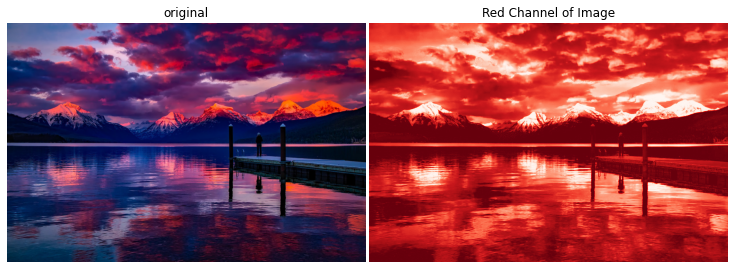

In [6]:
red = image[:, :, 0]
compare(image, red, 'Red Channel of Image', cmap_type='Reds_r')

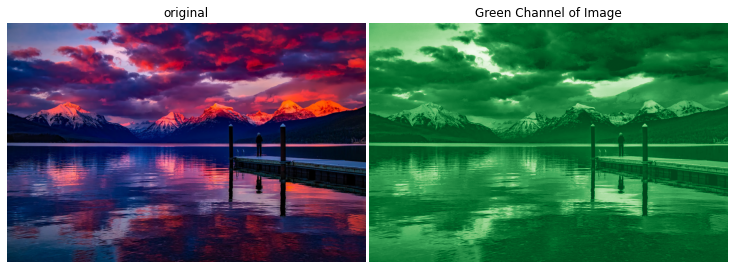

In [7]:
red = image[:, :, 1]
compare(image, red, 'Green Channel of Image', cmap_type='Greens_r')

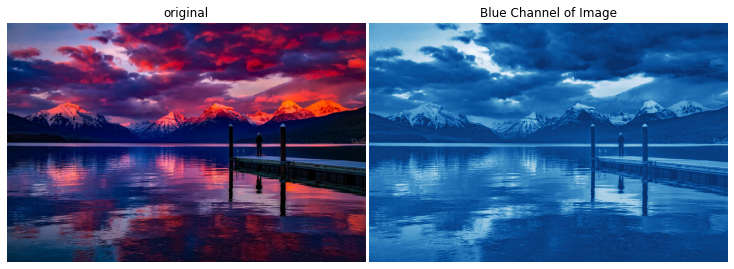

In [8]:
blue = image[:, :, 0]
compare(image, red, 'Blue Channel of Image', cmap_type='Blues_r')

In [9]:
# Images are unlike the usual Matplotlib plots. Their origin isn't located in the bottom left, but at the position (0, 0), the top left.
show(image, axis=True)

## Common Transformations

The most common image transformation we will be performing is converting color images to grayscale. Many image processing algorithms require grayscale, 2D arrays because color isn't the defining feature of images and computer can already extract enough information without it.


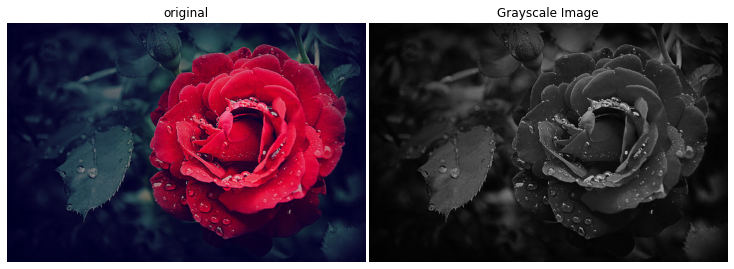

In [10]:
from skimage.color import rgb2gray

image = imread('images/grayscale_example.jpg')

# convert image to grayscale
gray = rgb2gray(image)

compare(image, gray, 'Grayscale Image')

In [11]:
print(f"The shape of the image - {image.shape}")

The shape of the image - (853, 1280, 3)


When we convert images to grayscale, they lose their 3rd dimension - the color channel. Instead, each cell in the image array now represents an integer in `uint8` type. They range from 0 to 255, giving 256 shades of gray.
You can also use NumPy functions like [`np.flipud`](https://numpy.org/doc/stable/reference/generated/numpy.flipud.html) or [`np.fliplr`](https://numpy.org/doc/stable/reference/generated/numpy.fliplr.html#numpy.fliplr) at your heart's desire to manipulate images in any way a NumPy array can be manipulated.


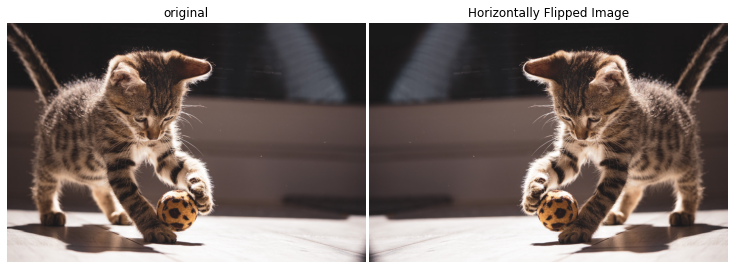

In [12]:
kitten = imread('images/horizontal_flip.jpg')
horizontal_flipped = np.fliplr(kitten)

compare(kitten, horizontal_flipped, "Horizontally Flipped Image")

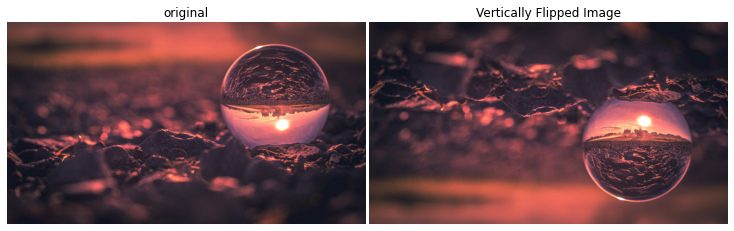

In [13]:
ball = imread('images/upside_down.jpg')
vertically_flipped = np.flipud(ball)

compare(ball, vertically_flipped, "Vertically Flipped Image")

## Histogram of Color Channels
Sometimes, it is useful to look at the intensity of each color channel to get a feel of the color distributions. We can do so by slicing each color channel and plotting their histograms. Here is a function to perform this operation:


In [14]:
def plot_with_hist_channel(img, channel):
    channels = ['red', 'green', 'blue']
    channels_idx = channels.index(channel)
    color = channels[channels_idx]

    extracted_channel = img[:, :, channels_idx]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
    ax1.imshow(img)
    ax1.axis('off')
    ax2.hist(extracted_channel.ravel(), bins=256, color=color)
    ax2.set_title(f"{channels[channels_idx]} histogram")

Apart from the few Matplotlib details, you should pay attention to the call of the hist function. Once we extract the color channel and its array, we flatten it into 1D array and then pass it to the hist function. The number of bins should be 256, one for every pixel value - 0 being pitch black and 255 being fully white.

Let's use the function for our colorful scenery image:


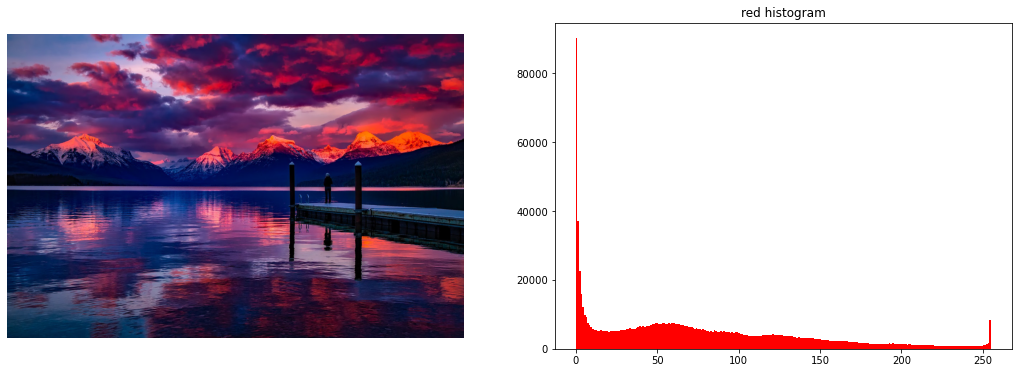

In [15]:
colorful_scenery = imread('images/colorful_scenery.jpg')
plot_with_hist_channel(colorful_scenery, 'red')

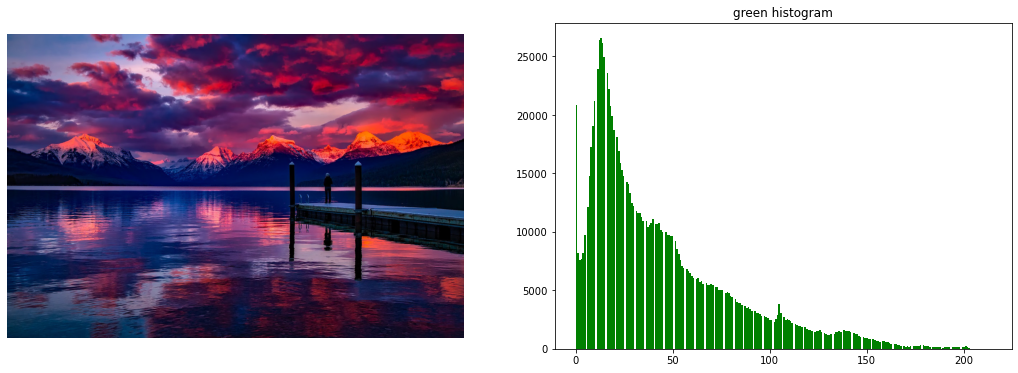

In [16]:
plot_with_hist_channel(colorful_scenery, 'green')

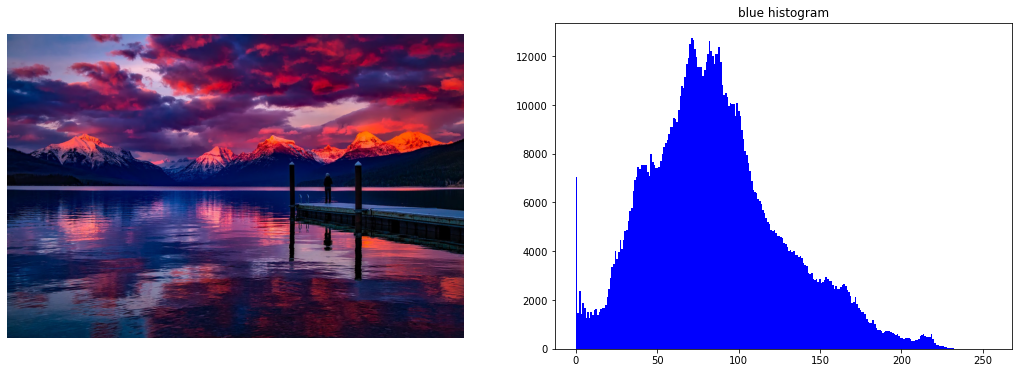

In [17]:
plot_with_hist_channel(colorful_scenery, 'blue')

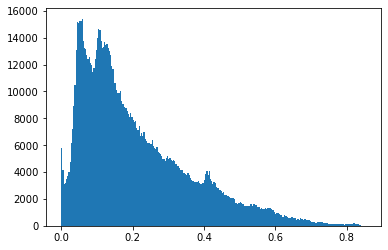

In [18]:
# We can also use histograms to find out the lightness in the image after converting it to a grayscale

gray_color_scenery = rgb2gray(colorful_scenery)
plt.hist(gray_color_scenery.ravel(), bins=256);

Most pixels have lower values as the scenery image is a bit darker.

## Filters

### 1. Manual Thresholding
Now, we arrive at the fun stuff - filtering images. The first operation we will learn is thresholding. Let's load an example image:

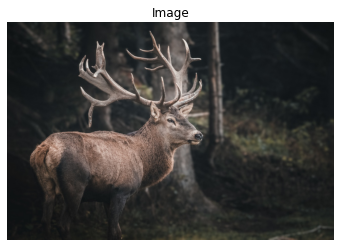

In [19]:
stag = imread('images/binary_example.jpg')
show(stag) # Show the image

Thresholding has many applications in image segmentation, object detection, finding edges or contours, etc. It is mostly used to differentiate the background and foreground of an image.

Thresholding works best on high contrast grayscale images, so we will convert the stag image:

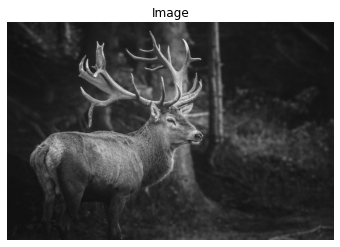

In [20]:
# Convert to grayscale
stag_gray = rgb2gray(stag)
show(stag_gray)

We will start with basic manual thresholding and move on to automatic.

First, we look at the mean value of all pixels in the gray image:

In [21]:
# mean value of all pixels
stag_gray.mean()

0.20056063095037996

> Note that the above gray image's pixels are normalized between 0 and 1 by dividing all their values by 256.

We obtain a mean of 0.2 which gives us a preliminary idea for the threshold we might want to use.

Now, we use this threshold to mask the image array. If the pixel value is lower than the threshold, its value becomes 0 - black or 1 - white if otherwise. In other words, we get a black and white, binary picture:

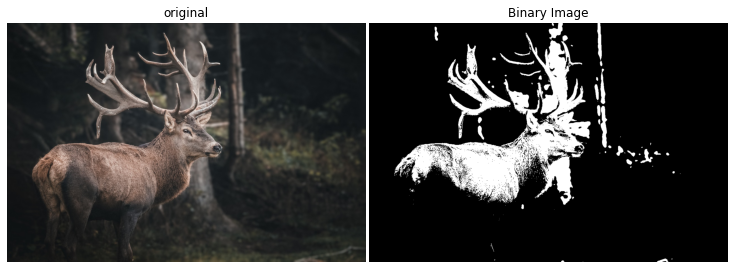

In [26]:
# Set the threshold
threshold = 0.35

# Binarize the image
binary_image = stag_gray > threshold
compare(stag, binary_image, "Binary Image")

In this version, we can differentiate the outline of the stag more clearly. We can reverse the mask so that the background turns white:

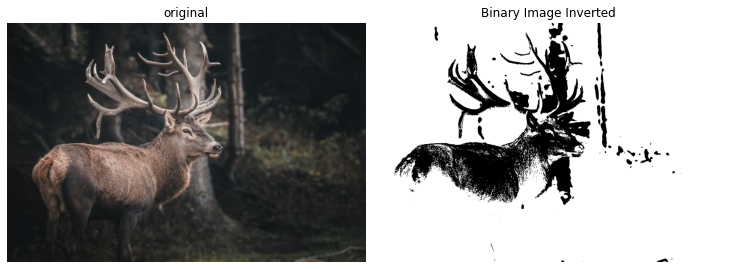

In [27]:
inverted_binary = stag_gray <= threshold
compare(stag, inverted_binary, 'Binary Image Inverted')